In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv


# Mental Disorder Classification

In [2]:
mental_dis = pd.read_csv('/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv')
mental_dis.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [3]:
mental_dis = mental_dis.drop('Patient Number', axis=1)

Feature names are pretty straightforward in regards to their meaning. Since the values in the dataset are mostly qualitative, I will change them into numeric representations.

First, get unique values for each entry so that we could gather how to label encode them.

In [4]:
for column in mental_dis.columns:
    unique_count = mental_dis[column].nunique()
    unique_values = mental_dis[column].unique()

    print(f"The number of unique values in {column}: {unique_count}")
    print(f"Unique values in {column}:")
    for value in unique_values:
          print(value)
    print('\n')

The number of unique values in Sadness: 4
Unique values in Sadness:
Usually
Sometimes
Seldom
Most-Often


The number of unique values in Euphoric: 4
Unique values in Euphoric:
Seldom
Most-Often
Usually
Sometimes


The number of unique values in Exhausted: 4
Unique values in Exhausted:
Sometimes
Usually
Seldom
Most-Often


The number of unique values in Sleep dissorder: 4
Unique values in Sleep dissorder:
Sometimes
Most-Often
Usually
Seldom


The number of unique values in Mood Swing: 2
Unique values in Mood Swing:
YES
NO


The number of unique values in Suicidal thoughts: 3
Unique values in Suicidal thoughts:
YES 
YES
NO


The number of unique values in Anorxia: 2
Unique values in Anorxia:
NO
YES


The number of unique values in Authority Respect: 2
Unique values in Authority Respect:
NO
YES


The number of unique values in Try-Explanation: 2
Unique values in Try-Explanation:
YES
NO


The number of unique values in Aggressive Response: 2
Unique values in Aggressive Response:
NO
YES


T

In [5]:
mental_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 16  Optimisi

In [6]:
mental_dis['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [7]:
mental_dis['Suicidal thoughts'] = mental_dis['Suicidal thoughts'].replace('YES ', "YES")
mental_dis['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64

## Map descriptive labels to numeric values

In [8]:
missing_data = mental_dis.isnull().sum()
missing_data

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [9]:
mapping_dict = {'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3}
mental_dis['Expert Diagnose'] = mental_dis['Expert Diagnose'].map(mapping_dict).astype(int)
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [10]:
yes_and_no_columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']

for column in yes_and_no_columns:
    mental_dis[column] = mental_dis[column].map({'YES': 1, 'NO': 0}).astype(int)
    
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [11]:
mental_dis['Sexual Activity'].dtype

dtype('O')

In [12]:
mental_dis = mental_dis.rename(columns={'Optimisim': 'Optimism'})

In [13]:
from_columns = ['Sexual Activity', 'Concentration', 'Optimism']
for column in from_columns:
    mental_dis[column] = mental_dis[column].astype(str).str.extract('(\d)')
    mental_dis[column] = pd.to_numeric(mental_dis[column])
    
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [14]:
mental_dis['Sexual Activity'].dtype

dtype('int64')

In [15]:
frequency_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for column in frequency_columns:
    mental_dis[column] = mental_dis[column].map({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}).astype(int)
    
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


## EDA

In [16]:
mental_dis.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.550000,0.933333,1.633333,1.458333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,1.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.129903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000
75%,2.000000,1.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,3.000000


### Heatmap for correlation analysis

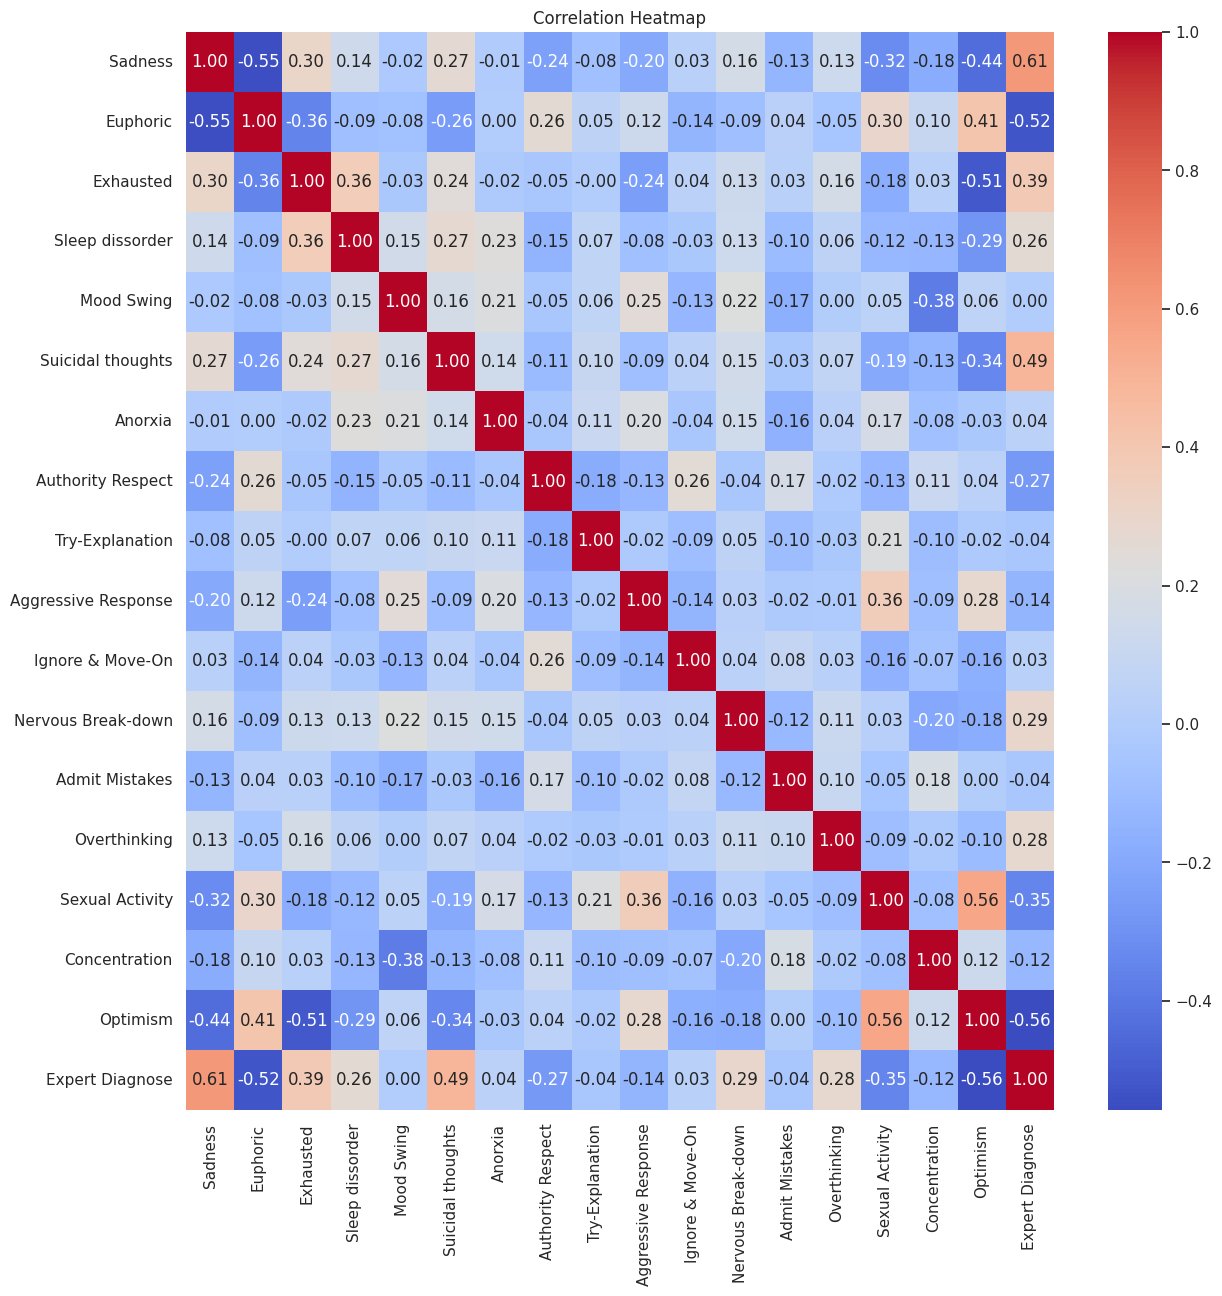

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

correlation_matrix = mental_dis.corr()

# create a heatmap
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()


### Stacked bar plot for each level of sadness

Sadness levels:
- Seldom: 0
- Sometimes: 1
- Usually: 2
- Most-Often: 3

Expert Diagnose: 
- Normal: 0
- Bipolar Type-1: 1
- Bipolar Type-2: 2
- Depression: 3

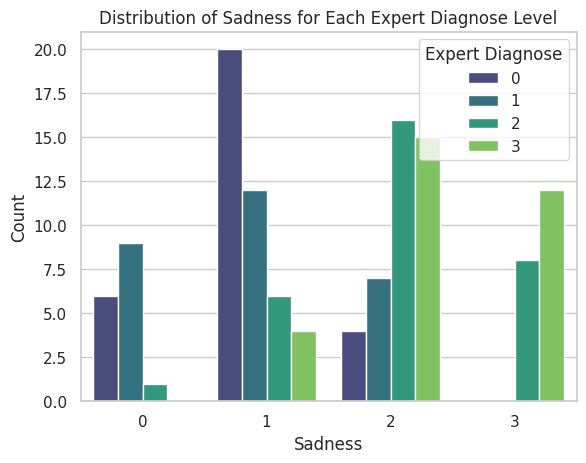

In [18]:
sns.countplot(x = 'Sadness', hue = 'Expert Diagnose', data = mental_dis, palette = 'viridis')
plt.title('Distribution of Sadness for Each Expert Diagnose Level')
plt.xlabel('Sadness')
plt.ylabel('Count')
plt.show()

The sadder the patients, the more likely to suffer from more severe mental disorders, such as depression or bipolar-type 2 disorder.

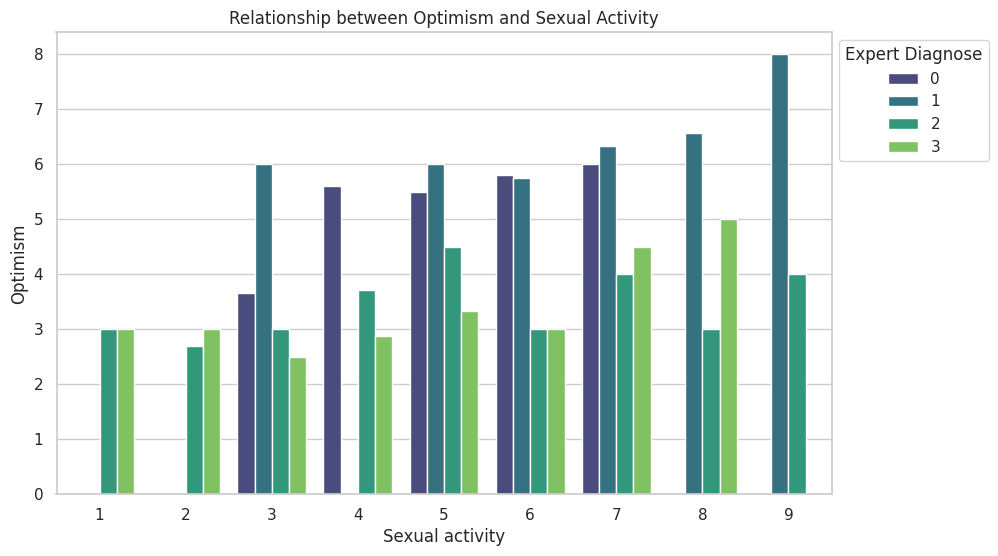

In [19]:
plt.figure(figsize=(10, 6))

sns.barplot(y = 'Optimism', x = 'Sexual Activity', hue = 'Expert Diagnose', data = mental_dis, errorbar = None, palette = 'viridis')
plt.title('Relationship between Optimism and Sexual Activity')
plt.xlabel('Sexual activity')
plt.ylabel('Optimism')

# place the legend at the top-right corner of the plot, outside the plot area
plt.legend(title = 'Expert Diagnose', bbox_to_anchor=(1, 1))

plt.show()

Interestingly, patients with the highest sexual activity seem to be the most optimistic and be less prone to depression, while those with the lowest sexual activity suffer from the most severe mental disorders described by the dataset and have low levels optimism as well.

Other results from the heatmap that I found interesting were the fact that those more exhausted are less likely to be euphoric, euhaustion is also inversely correlated with optimism, and the aggresive response is positively correlated with the sexual activity. No wonder on the other hand that suicidal thoughts are positively associated with the mental health problems (expert diagnose).

## Modeling